# Car Price Prediction Model

### Analyzing features

+ **Name** - The brand and model of the car.
+ **Year** -  The year of the car's model.
+ **Selling Price** -  The selling price of the car (to be predicted).
+ **KM driven** - The distance travelled of the car in kilometers.
+ **Fuel** - The fuel type of the car.
+ **Seller Type** -  The type of seller of the car listing.
+ **Transmission** - The type of transition of the car.
+ **Owner** - The number of previous owners of the car.
+ **Mileage** - The fuel efficiency of the car.
+ **Engine** - The engine power of the car.
+ **Max Power** - The horsepower of the car sent to the wheels.
+ **Torque** - The force generated by the car's engine.
+ **Seats** - The number of seats in the car.



### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
import time
import math
import warnings
warnings.filterwarnings('ignore')

### Checking library versions

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.24.4', '1.5.3', '0.12.2', '3.7.2')

### 1. Load data


In [3]:
# Load the csv file into a variable
df = pd.read_csv('./data/Cars - Cars.csv')

In [4]:
# Check the headers of the data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of the data
df.shape

(8128, 13)

In [6]:
# Check the data types of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Checking the columns
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 2. Exploratory Data Analysis

The names of the columns are determined to not need renaming.

As per the instructions, the lines of data containing CNG and LPG as fuel, test drive cars as owner will be deleted. The column of torque will also be deleted.

In [8]:
df = df[df.fuel != "CNG"]
df = df[df.fuel != "LPG"]
df = df[df.owner != "Test Drive Car"]
df.pop("torque")

# Check the shape of the modified data
df.shape

(8028, 12)

In [9]:
df["selling_price"].isna().sum()

0

### Label encoding

The replace method is used since LabelEncoder from sklearn does not allow for custom order. The map dictionary contains the order mapping of the owner column. Since rows containing "Test Drive Car" are already deleted, it is not included in the mapping.

In [10]:
map={"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4}
df.replace({"owner":map},inplace=True)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


The columns "Mileage","Engine","Max Power" and "Name" are modified as required by the instructions.

In [11]:
df.mileage = df.mileage.str.split().str[0]
df.mileage = df.mileage.astype(float)

df.engine = df.engine.str.split().str[0]
df.engine = df.engine.astype(float)

df.max_power = df.max_power.str.split().str[0]
df.max_power = df.max_power.astype(float)

df.name = df.name.str.split().str[0]

In [12]:
# Checking if modifications and data type changes are applied
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### Univariate analysis
**Count Plot**

The "fuel", "transmission" and "seats" columns will be analyzed using count plot since the values of these columns contain only a few variations and count plot will clearly show the distribution of the values.

<Axes: xlabel='fuel', ylabel='count'>

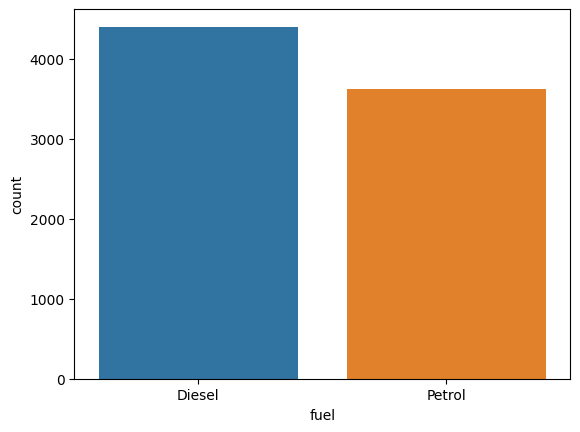

In [14]:
sns.countplot(data = df, x = 'fuel')

<Axes: xlabel='transmission', ylabel='count'>

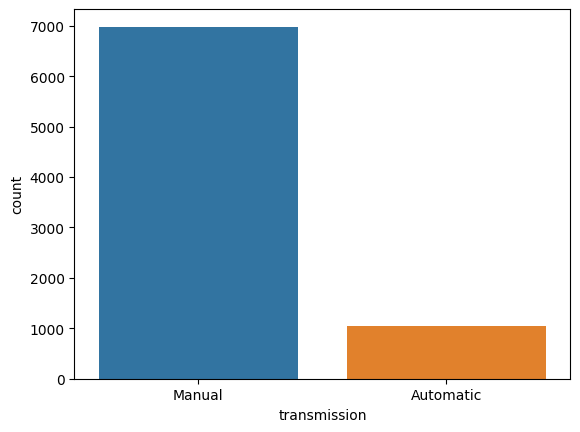

In [15]:
sns.countplot(data = df, x = 'transmission')

<Axes: xlabel='seats', ylabel='count'>

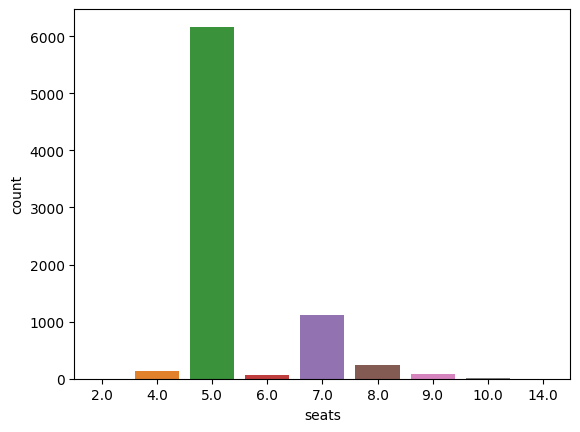

In [16]:
sns.countplot(data = df, x = 'seats')

We can observe that although the types of fuel of the cars are somewhat evenly distributed, the major of the cars have a manual transmission and are five seaters.

**Distribution Plot**

The "year" column will be analyzed by using distribution plot to see its distribution

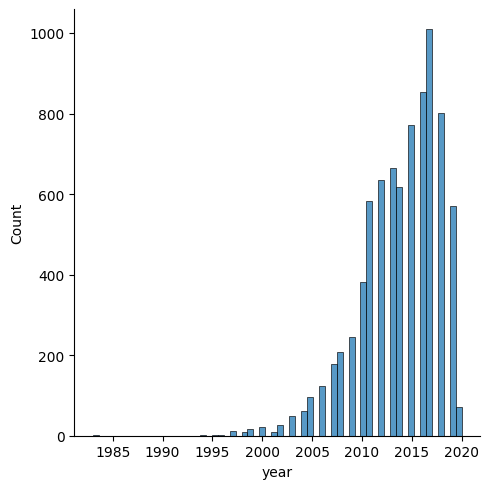

In [17]:
sns.displot(data = df, x = 'year')

### Multivariate Analysis
**Box Plot**

The "fuel" column will be analyzed using box plot in relation to the selling price of the car to see if any outliers exist and how the distribution impacts the price.

Text(0.5, 0, 'No. of previous owners')

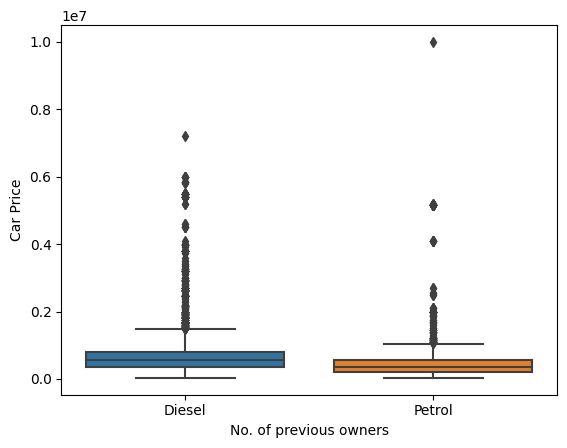

In [18]:
sns.boxplot(x = df.fuel, y = df.selling_price)
plt.ylabel("Car Price")
plt.xlabel("No. of previous owners")

**Scatter Plot**

The "year" column and the "transmission" colum are used in a scatter plot to see the relation between their values and the selling price of the cars.

<Axes: xlabel='year', ylabel='selling_price'>

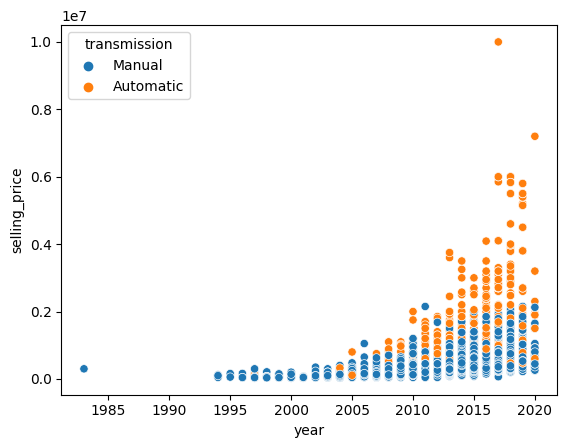

In [19]:
sns.scatterplot(x = df.year, y = df.selling_price, hue = df.transmission)

In addition to the modifications from the instructions, the "name" column will also be label encoded. The reason being that the brand of the cars might have a significant impact on the sell price of the cars and as such, the data of this column needs to explored during EDA phase, and the correlation matrix requires this column to be label encoded.

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# df.name = le.fit_transform(df.name)

# df.name.unique()

In [21]:
# # Check to see what each number maps to
# le.classes_

In [22]:
# # Saving the names and what they map to in a dictionary to put into model file
# name_map = {}
# keys = le.classes_
# values = df.name.unique()
# for key in keys:
#     for value in values:
#         name_map[key] = value
#         values = np.delete(values, np.where(values == value))
#         break

# name_map

The "fuel","seller type" and "transmission" columns will also be label encoded for the above reasons, although the impact of these features is unknown.

In [23]:
df.fuel = le.fit_transform(df.fuel)

df.fuel.unique()

array([0, 1])

In [24]:
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [25]:
df.seller_type = le.fit_transform(df.seller_type)

df.seller_type.unique()

array([1, 0, 2])

In [26]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

In [27]:
df.transmission = le.fit_transform(df.transmission)

df.transmission.unique()

array([1, 0])

In [28]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   int32  
 5   seller_type    8028 non-null   int32  
 6   transmission   8028 non-null   int32  
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int32(3), int64(4), object(1)
memory usage: 979.3+ KB


**Correlation Matrix**

The correlation matrix shows us how each of the features related to one another and most importantly, how they relate to our label; the selling price of the cars.

In [30]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,0,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,0,1,1,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,1,1,1,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,0,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,1,1,1,1,16.10,1298.0,88.20,5.0


<Axes: >

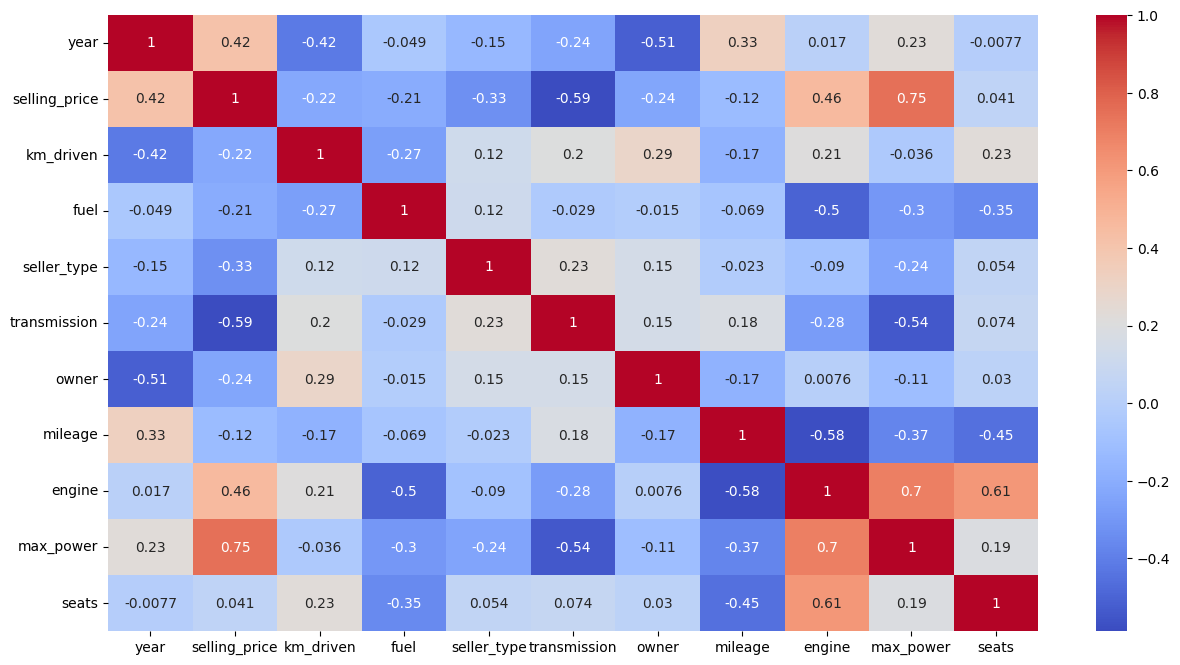

In [31]:
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

From the heatmap, we can see that the selling price of the cars are highly correlated to the year, transmission, engine power and max power of the cars. This confers with my assumption that the year and engine power of the car will have an impact on the price of the car.

The engine power and max power of the cars are highly correlated, as they should be, considering both shows the performance of the cars. Therefore, both of these features cannot be used but one of them should be a feature in our model.

I believe the mileage of the car and the brand should also have a significant impact on the selling price of the car, considering most people would care about their fuel economy and also what brand of car they are buying.

**Predictive Power Score**

The predictive power score library is used to more accurately see the correlation results and confirm our assumptions of the relation of the features to the label.

<Axes: xlabel='x', ylabel='y'>

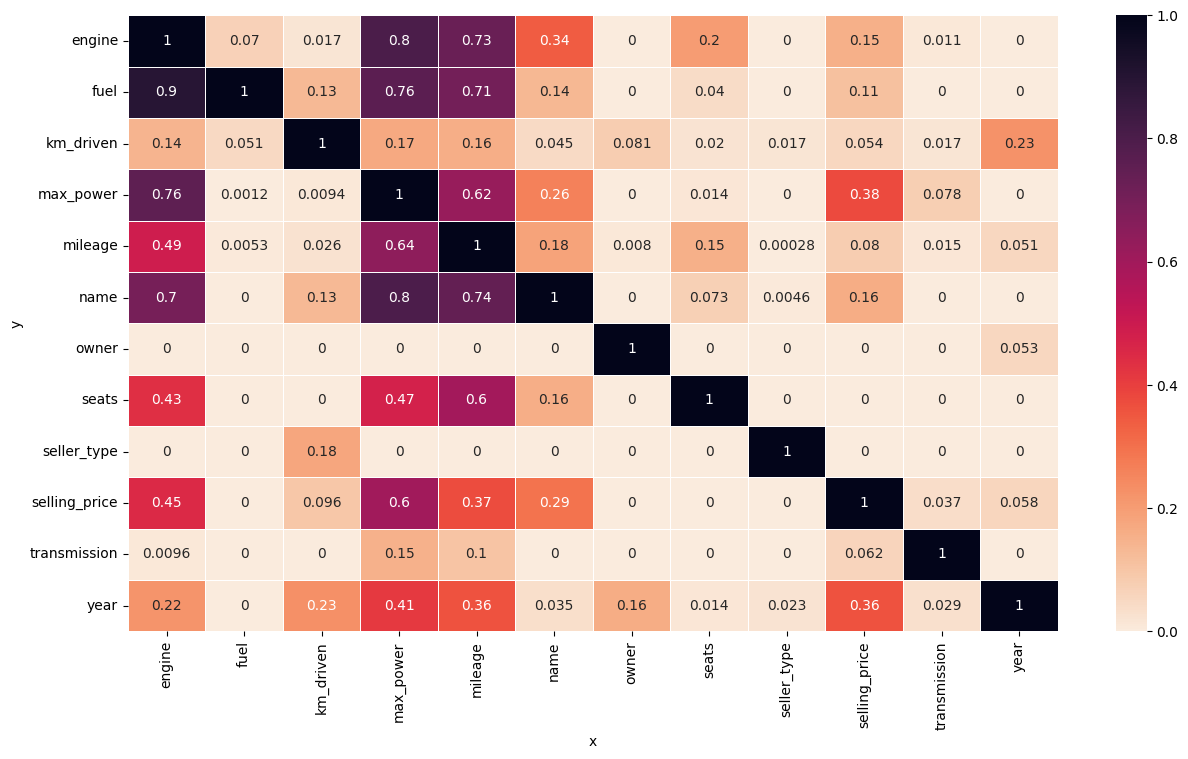

In [32]:
import ppscore as pps

# Copying the data frame to avoid manipulating the original data frame
dfcopy = df.copy()

# Preprocessing using pivot
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="rocket_r", linewidths=0.5, annot=True)

In [33]:
df.reset_index(inplace=True)

In [34]:
from sklearn.preprocessing import OneHotEncoder

# Create function for one-hot encoding a feature in dataframe 
def one_hot_transform(encoder, dataframe, feature):

    encoded = encoder.transform(dataframe[[feature]])

    # Transform encoded data arrays into dataframe where columns are based values
    categories = encoder.categories_[0]
    feature_df = pd.DataFrame(encoded.toarray(), columns=categories[1:])
    concat_dataframe = pd.concat([dataframe, feature_df], axis=1)
    
    return concat_dataframe.drop(feature, axis=1)

In [35]:
# Since 'brand' and 'seller_type' have than two unique values, we should apply one-hot encoding
brand_ohe = OneHotEncoder(drop='first').fit(df[['name']])
original_df = df.copy()
df = one_hot_transform(brand_ohe, df, 'name')

In [36]:
brand_ohe.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [37]:
# df =pd.get_dummiers(df, columns=['name'])

In [38]:
df['year'].value_counts()

2017    1009
2016     853
2018     802
2015     772
2013     665
2012     636
2014     617
2011     583
2019     571
2010     382
2009     246
2008     209
2007     177
2006     123
2005      97
2020      71
2004      62
2003      48
2002      27
2000      21
1999      17
1997      11
2001      10
1998      10
1996       3
1994       3
1995       2
1983       1
Name: year, dtype: int64

### 3. Feature Engineering
The step of feature engineering is skipped considering most of the columns do not require to be merged or to produce derivations.

### 4. Feature Selection

The features selected are "name", "engine" and "mileage". The reason being most people would care what brand their cars are, how much power the engine can produce and how good the fuel economy is. Engine power is chosen over max power (aka break horse power) since most people only know about the engine power (horse power).

In [39]:
df["selling_price"].isna().sum()

0

In [40]:
# Selecting features
brand_cats = list(brand_ohe.categories_[0][1:])
selected_features = ["max_power","year","fuel"] + brand_cats
x = df[selected_features]
#y = df["selling_price"]
# y = np.log(df["selling_price"])

# Using qcut to turn selling price into a categorical label
y, k_range = pd.qcut(df["selling_price"], q=4,labels = [0,1,2,3],retbins=True)

In [41]:
selected_features

['max_power',
 'year',
 'fuel',
 'Ashok',
 'Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Opel',
 'Peugeot',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [42]:
# Showing the range of each category in y
k_range = {0:f"{k_range[0]} - {k_range[1]}",
     1:f"{k_range[1]} - {k_range[2]}",
     2:f"{k_range[2]} - {k_range[3]}",
     3:f"{k_range[3]} - {k_range[4]}"}
k_range

{0: '29999.0 - 260000.0',
 1: '260000.0 - 450000.0',
 2: '450000.0 - 680000.0',
 3: '680000.0 - 10000000.0'}

In [43]:
# Checking if y was correctly turned into discrete values
y.isna().sum()

0

In [44]:
y.value_counts()

0    2050
1    2044
3    1991
2    1943
Name: selling_price, dtype: int64

**Train Test Split**

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

### 5. Preprocessing

In [46]:
# Check for null values
X_train[selected_features].isna().sum()

max_power        169
year               0
fuel               0
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [47]:
X_test[selected_features].isna().sum()

max_power        39
year              0
fuel              0
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [48]:
y_train.isna().sum()

0

In [49]:
y_test.isna().sum()

0

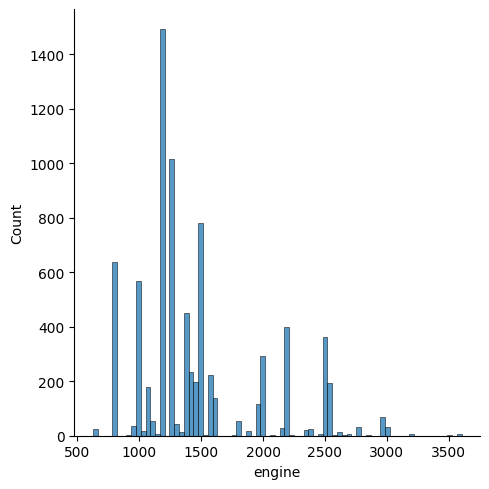

In [50]:
sns.displot(data=df, x='engine')

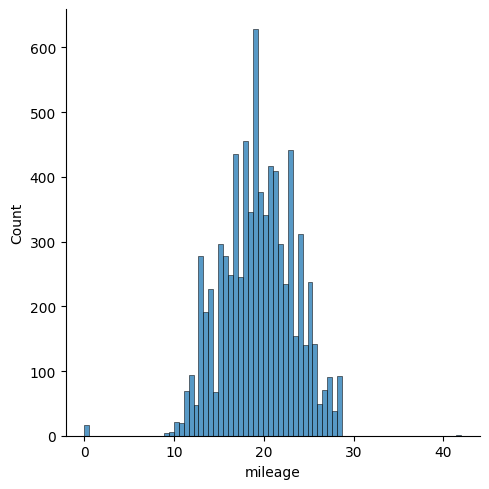

In [51]:
sns.displot(data=df, x='mileage')

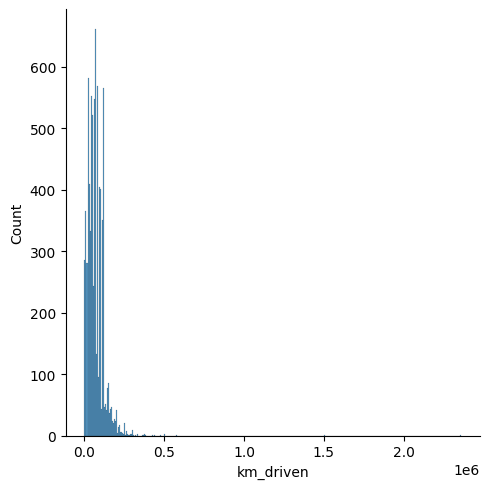

In [52]:
sns.displot(data=df,x='km_driven')

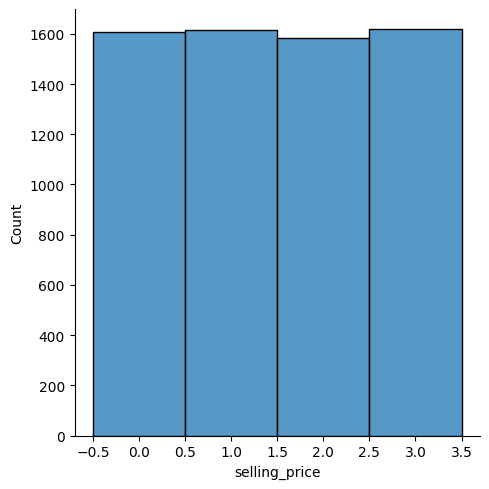

In [53]:
sns.displot(y_train)

In [54]:
# Saving values to put into model file
fuel_default = X_train['fuel'].mode()
year_default = X_train['year'].mode()
max_default = X_train['max_power'].median()

In [55]:
# Training set

# Filling the other columns
X_train['fuel'].fillna(X_train['fuel'].mode(), inplace=True)
X_train['year'].fillna(X_train['year'].mode(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [56]:
# Testing set
X_test['fuel'].fillna(X_test['fuel'].mode(), inplace=True)
X_test['year'].fillna(X_test['year'].mode(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [57]:
# Since y is now a categorical value, we find the ratio of y train and y test to replace missing values 
# maintaining the ratio
ratio = y_train.value_counts(normalize=True,sort=False)
print(ratio)

0    0.250234
1    0.251324
2    0.246496
3    0.251946
Name: selling_price, dtype: float64


In [58]:
# number of missing values in y train, to replace by maintaining ratio
missing = y_train.isna().sum()

num3 = int(np.round(ratio[3] * missing))
num2 = int(np.round(ratio[2] * missing))
num1 = int(np.round(ratio[1] * missing))
num0 = int(np.round(ratio[0] * missing))

print(num3,num2,num1, num0)

0 0 0 0


In [59]:
# Since there no missing values, we don't need to fill
# If there were missing values, uncomment the lines below

# y_train.fillna(3.0, limit = num3, inplace=True)
# y_train.fillna(2.0, limit = num2, inplace=True)
# y_train.fillna(1.0, limit = num1, inplace=True)
# y_train.fillna(0.0, limit = num0, inplace=True)

In [60]:
# Repeating the same steps for y test
ratio = y_test.value_counts(normalize=True,sort=False)
print(ratio)

missing = y_test.isna().sum()

num3 = int(np.round(ratio[3] * missing))
num2 = int(np.round(ratio[2] * missing))
num1 = int(np.round(ratio[1] * missing))
num0 = int(np.round(ratio[0] * missing))

print(num3,num2,num1, num0)

# y_train.fillna(3.0, limit = num3, inplace=True)
# y_train.fillna(2.0, limit = num2, inplace=True)
# y_train.fillna(1.0, limit = num1, inplace=True)
# y_train.fillna(0.0, limit = num0, inplace=True)

0    0.275841
1    0.267746
2    0.224159
3    0.232254
Name: selling_price, dtype: float64
0 0 0 0


In [61]:
# Checking values
X_train[selected_features].isna().sum()

max_power        0
year             0
fuel             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [62]:
X_test[selected_features].isna().sum()

max_power        0
year             0
fuel             0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [63]:
y_train.isna().sum()

0

In [64]:
y_test.isna().sum()

0

**Checking outliers**

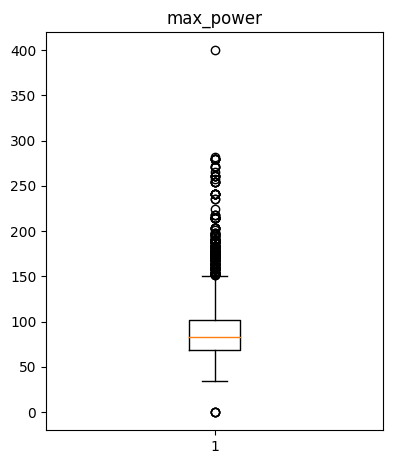

In [65]:
# Create a dictionary of columns.
col_dict = {'max_power':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [66]:
def outlier_count(col, data = X_train):
    
    # Calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # Calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # Count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # Calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [67]:
for col in X_train.columns:
    outlier_count(col)


---------------max_power---------------

Number of outliers: 476
Percent of data that is outlier: 7.41%

---------------year---------------

Number of outliers: 60
Percent of data that is outlier: 0.93%

---------------Audi---------------

Number of outliers: 27
Percent of data that is outlier: 0.42%

---------------BMW---------------

Number of outliers: 103
Percent of data that is outlier: 1.6%

---------------Chevrolet---------------

Number of outliers: 181
Percent of data that is outlier: 2.82%

---------------Daewoo---------------

Number of outliers: 3
Percent of data that is outlier: 0.05%

---------------Datsun---------------

Number of outliers: 55
Percent of data that is outlier: 0.86%

---------------Fiat---------------

Number of outliers: 36
Percent of data that is outlier: 0.56%

---------------Force---------------

Number of outliers: 5
Percent of data that is outlier: 0.08%

---------------Ford---------------

Number of outliers: 328
Percent of data that is outlier: 5

In [68]:
y_train.values

[1, 3, 1, 3, 0, ..., 0, 2, 1, 3, 1]
Length: 6422
Categories (4, int64): [0 < 1 < 2 < 3]

**Scaling**

In [69]:
from sklearn.preprocessing import StandardScaler

# Feature scaling helps improve reach convergence faster
scaler = StandardScaler()
cont_features = ["max_power","year"]
X_train[cont_features] = scaler.fit_transform(X_train[cont_features])
X_test[cont_features]  = scaler.transform(X_test[cont_features])

In [70]:
# add intercept to our X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [71]:
# Shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (6422, 35)
Shape of X_test:  (1606, 35)
Shape of y_train:  (6422,)
Shape of y_test:  (1606,)


In [72]:
X_train[0]

array([ 1.        , -1.03087045, -0.20503496,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [73]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [74]:
X_train

array([[ 1.        , -1.03087045, -0.20503496, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.09058817,  0.78853945, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.16095767, -0.70182216, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.69856073,  1.53372026, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.55778022,  0.04335865, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , -0.67051771,  0.54014585, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
Y_train_encoded

array([[0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [76]:
X_train[0]

array([ 1.        , -1.03087045, -0.20503496,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

### 6. Modeling

In [77]:
#experiment tracking
import mlflow
import os
import mlflow.sklearn
mlflow.set_tracking_uri("https://mlflow.cs.ait.ac.th/")
os.environ["LOGNAME"] = "vaxer"
mlflow.set_experiment(experiment_name="st124145-a3")

<Experiment: artifact_location='mlflow-artifacts:/180983965624512756', creation_time=1695129772567, experiment_id='180983965624512756', last_update_time=1695129772567, lifecycle_stage='active', name='st124145-a3', tags={}>

In [123]:
class LogisticRegression:
    
    def __init__(self,regularization, k, n, method, alpha = 0.001,theta_init='zeros', max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.theta_init = theta_init
        self.method = method
        # self.pre = []  # Initialize as empty lists
        # self.re = []
        # self.f1 = []
        # self.ratio = []
        # self.support = []
    
    def fit(self, X, Y):
        # self.W = np.random.rand(self.n, self.k)
        if self.theta_init == 'zeros':
            self.W = np.zeros((self.n, self.k))
        elif self.theta_init == 'xavier':
            m = X_train.shape[0]
            # calculate the range for the weights
            lower , upper = -(1.0 / math.sqrt(m)), (1.0 / math.sqrt(m))
            # randomly pick weights within this range
            # generate random numbers
            numbers = np.random.rand((self.n, self.k))
            self.W = lower + numbers * (upper - lower)
            
        self.losses = []
        
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            # batch_size = 32
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m + self.regularization(self.W)
        error = h - Y
        grad = self.softmax_grad(X, error)  + self.regularization.derivation(self.W)
        return loss, grad

    def softmax(self, theta_t_x):
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    # Accuracy function of the model
    def accuracy(self, X, Y):
        # accuracy = correct pred / total pred
        yhat = self.predict(X)
        return np.sum(yhat == Y)/ yhat.shape[0]
    
    def confusion_matrix(self, ytrue, ypred):
        # convert arrays to lists to allow easy data manipulation
        y_p = ypred.tolist()
        y_a = ytrue.tolist()

        # initialize empty confusion matrix
        cm = [[0 for x in range(self.k)] for y in range(self.k)]

        # ensure numnber of prediction and actual values are the same
        assert len(y_p) == len(y_a)

        # fill the confusion matrix
        for i in range (len(y_p)):
            for j in range (self.k):
                for l in range(self.k):
                    if y_a[i] == j and y_p[i] == l:
                        cm[j][l] += 1
        
        # true positive list (when cm[i][i])
        self.tp = [0 for x in range(self.k)]
        for i in range (self.k):
            self.tp[i] = cm[i][i]

        # true negative list is no required for precision and recall
        # false negative list
        self.fn = [0 for x in range (self.k)]
        for i in range (self.k):
            for j in range (self.k):
                if j != i:
                    self.fn[i] += cm[i][j]
        
        # false positive list
        self.fp = [0 for x in range (self.k)]
        for i in range (self.k):
            for j in range (self.k):
                if j != i:
                    self.fp[i] += cm[j][i]
    
    def precision(self):
        self.pre = [0 for x in range (self.k)]
        for i in range (self.k):
            if (self.tp[i] + self.fp[i]) == 0:
                self.pre[i] = 0
            else:
                self.pre[i] = self.tp[i] / (self.tp[i] + self.fp[i])
        return self.pre
    
    def recall(self):
        self.re = [0 for x in range (self.k)]
        for i in range (self.k):
            if (self.tp[i] + self.fp[i]) == 0:
                self.re[i] = 0
            else:
                self.re[i] = self.tp[i] / (self.tp[i] + self.fn[i])
        return self.re
    
    def f1_score(self):
        self.f1 = [0 for x in range (self.k)]
        for i in range (self.k):
            if self.pre[i] == 0 and self.re[i] == 0:
                self.f1[i] = 0
            else:
                self.f1[i] = (2 * self.pre[i] * self.re[i]) / (self.pre[i] + self.re[i])
        return self.f1
    
    def macro_precision(self):
        return sum(self.pre) / len(self.pre)
    
    def macro_recall(self):
        return sum(self.re) / len(self.re)
    
    def macro_f1(self):
        return sum(self.f1) / len(self.f1)
    
    def weighted_precision(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.pre[i]
        return denominator / self.Y_num
    
    def weighted_recall(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.re[i]
        return denominator / self.Y_num
    
    def weighted_f1(self):
        denominator = 0
        for i in range (self.k):
            denominator += self.support[i]*self.f1[i]
        return denominator / self.Y_num
    
    def classification_report_scratch(self, X, Y):
        # Method to show classification report similar to sklearn
                    
        # Call confusion matrix method to set TP,TN,FP,FN
        self.confusion_matrix(Y, self.predict(X))
        print(self.tp, self.fp, self.fn)

        # Calculate ratio of y for weighted calculations
        self.ratio = Y.value_counts(normalize=True, sort=False)

        # Support for classification report
        self.support = Y.value_counts(normalize=False, sort=False)

        # Total number of samples
        self.Y_num = Y.shape[0]

        # Call all methods to store values
        self.precision()
        self.recall()
        self.f1_score()
        macro_precision = self.macro_precision()  # Call these methods
        macro_recall = self.macro_recall()        # to calculate their values
        macro_f1 = self.macro_f1()                # before using them
    

        print("=========Classification report scratch=======")
        print("\t\tprecision \trecall \tf1 \tsupport\n")
        for i in range(self.k):
            print(f"{i} \t\t{self.pre[i]:.2f} \t{self.re[i]:.2f} \t{self.f1[i]:.2f} \t{self.support[i]}")
        print(f"\naccuracy \t\t\t{self.accuracy(X, Y):.2f} \t{Y.shape[0]}")
        print(f"macro avg \t{macro_precision:.2f} \t{macro_recall:.2f} \t{macro_f1:.2f} \t{Y.shape[0]}")
        print(f"weighted avg \t{self.weighted_precision():.2f} \t{self.weighted_recall():.2f} \t{self.weighted_f1():.2f} \t{Y.shape[0]}")

    def _coef(self):
        return self.W[1:]
    
    def feature_importance(self):
        feature_names = selected_features
        importance_values = np.mean(np.abs(model._coef()[0:34]), axis=1)

        # Create a bar chart for feature importance
        plt.figure(figsize=(8, 6))
        plt.barh(feature_names, importance_values, color='blue')
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance Graph')
        plt.xlim([0,np.max(self._coef())])  # Set the x-axis limits
        plt.grid(axis='x', linestyle='--', alpha=0.6)

        plt.show()


In [124]:
class NormalPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return 0 # returning zero because normal just means using linear regression with no regularization
        
    def derivation(self, theta):
        return 0 # returning zero because normal just means using linear regression with no regularization

class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio = 0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')

class Lasso(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')
        
class Ridge(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')
        
class ElasticNet(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001,theta_init='zeros', l=0.1, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, k, n, method, alpha,theta_init='zeros')


In [80]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [81]:
from sklearn.preprocessing import PolynomialFeatures
#iterating through all possible parameters
polynomials = [2,3,4,"no"]
regs = ["Ridge", "Lasso", "ElasticNet","Normal"] #type of regularization
methods = ["batch","minibatch","sto"]
alphas = [0.01,0.001,0.0001]


for polynomial in polynomials:
    for reg in regs:
        for method in methods:
            for alpha in alphas:
                if polynomial == "no":
                    X_train_poly, X_test_poly = X_train, X_test # No transformation for other regressions
                else:
                    # Apply polynomial feature transformation
                    poly = PolynomialFeatures(degree=polynomial, include_bias=False)
                    X_train_poly = poly.fit_transform(X_train)
                    X_test_poly = poly.transform(X_test)                
                # #######

                k_num = k
                n = X_train_poly.shape[1]
                params = {"k":k_num, "n":n, "method": method,"alpha": alpha, "l": 0.1}
                mlflow.start_run(run_name=f"method-{params['method']}-reg-{reg}", nested=True)
                mlflow.log_params(params=params)

                print("="*5, polynomial, "="*5)
                print("="*5, reg, "="*5)                        
                print("="*5, method, "="*5)  
                print("="*5, alpha, "="*5)
                                      

                
                type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet, Normal
                model = type_of_regression(**params)  
                model.fit(X_train_poly, Y_train_encoded)
                yhat = model.predict(X_train_poly)

                model.classification_report_scratch(X_train_poly,y_train)
                acc = model.accuracy(X_train_poly,y_train)
                f1 = model.weighted_f1()

                print("Accuracy: ", acc)
                mlflow.log_metric(key="accuracy", value=acc)

                print("F1 score: ", f1)
                mlflow.log_metric(key="weighted_f1_score", value=f1)

                signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                # #######

                mlflow.end_run()

===== 2 =====
===== Ridge =====
===== batch =====
===== 0.01 =====
Loss at iteration 0 1.3862943611198901
Loss at iteration 500 nan
Loss at iteration 1000 nan
Loss at iteration 1500 nan
Loss at iteration 2000 nan
Loss at iteration 2500 nan
Loss at iteration 3000 nan
Loss at iteration 3500 nan
Loss at iteration 4000 nan
Loss at iteration 4500 nan
time taken: 17.177064657211304
[1607, 0, 0, 0] [4815, 0, 0, 0] [0, 1614, 1583, 1618]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.25 	1.00 	0.40 	1607
1 		0.00 	0.00 	0.00 	1614
2 		0.00 	0.00 	0.00 	1583
3 		0.00 	0.00 	0.00 	1618

accuracy 			0.25 	6422
macro avg 	0.06 	0.25 	0.10 	6422
weighted avg 	0.06 	0.25 	0.10 	6422
Accuracy:  0.2502335720959203
F1 score:  0.10016822776389185
===== 2 =====
===== Ridge =====
===== batch =====
===== 0.001 =====
Loss at iteration 0 1.3862943611198901
Loss at iteration 500 79.3359571602864
Loss at iteration 1000 104.77877516987
Loss at iteration 1500 117.88891511662

KeyboardInterrupt: 

In [81]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test) 

In [105]:
model = Normal(k,X_train_poly.shape[1],"batch",0.0001,0.1)
model.fit(X_train_poly, Y_train_encoded)

Loss at iteration 0 1.3862943611198901
Loss at iteration 500 0.5170637995660866
Loss at iteration 1000 0.5032072133040525
Loss at iteration 1500 0.49639199959188407
Loss at iteration 2000 0.4919221100523019
Loss at iteration 2500 0.48861377618542307
Loss at iteration 3000 0.4860154432001654
Loss at iteration 3500 0.4839196354442587
Loss at iteration 4000 0.4822042039076886
Loss at iteration 4500 0.48077668023206704
time taken: 245.6618206501007


In [106]:
model._coef().shape

(8434, 4)

In [107]:
import pickle

# Save the model to disk
filename = './models/Staging/st124145-a3-model-v'
pickle.dump(model, open(filename, 'wb'))

In [108]:
yhat = model.predict(X_train_poly)
print("=========Classification report=======")
print("Report: ", classification_report(y_train, yhat))
model.classification_report_scratch(X_train_poly,y_train)

=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.88      0.86      0.87      1607
           1       0.72      0.71      0.71      1614
           2       0.70      0.74      0.72      1583
           3       0.87      0.86      0.87      1618

    accuracy                           0.79      6422
   macro avg       0.79      0.79      0.79      6422
weighted avg       0.79      0.79      0.79      6422

[1386, 1146, 1166, 1391] [189, 446, 493, 205] [221, 468, 417, 227]
=========Classification report scratch=======
		precision 	recall 	f1 	support

0 		0.88 	0.86 	0.87 	1607
1 		0.72 	0.71 	0.71 	1614
2 		0.70 	0.74 	0.72 	1583
3 		0.87 	0.86 	0.87 	1618

accuracy 			0.79 	6422
macro avg 	0.79 	0.79 	0.79 	6422
weighted avg 	0.79 	0.79 	0.79 	6422


### 7. Testing

In [109]:
yhat = model.predict(X_test_poly)
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       443
           1       0.72      0.72      0.72       430
           2       0.66      0.71      0.69       360
           3       0.85      0.84      0.85       373

    accuracy                           0.78      1606
   macro avg       0.78      0.78      0.78      1606
weighted avg       0.79      0.78      0.78      1606



In [110]:
model._coef().shape

(8434, 4)

### 8. Feature Importance

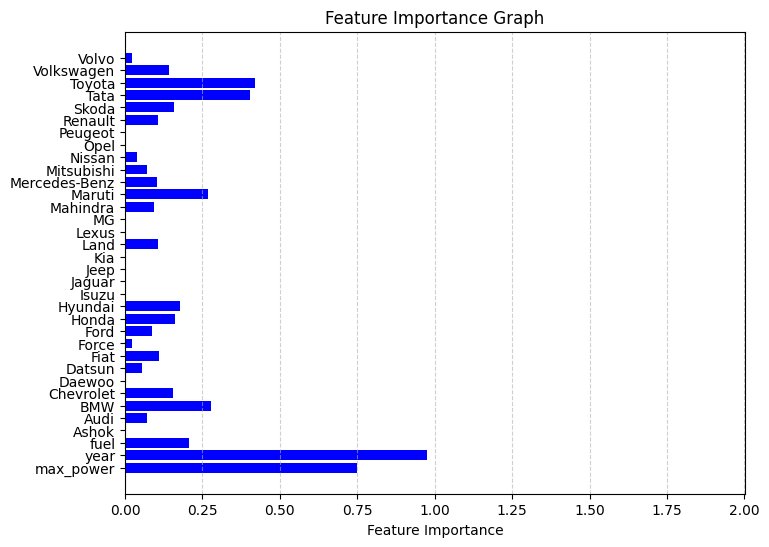

In [111]:
model.feature_importance()

### 9. Inference

In [112]:
import pickle
values = {
    'scaler': scaler,
    'ohe': brand_ohe,
    'k_range': k_range,
    'poly': poly,
    'fuel_default': fuel_default,
    'year_default': year_default,
    'max_default': max_default
}
filename = 'models/Staging/values.pkl'
with open(filename, 'wb') as handle:
    pickle.dump(values, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [127]:
from utils import load_mlflow
model1 = load_mlflow("Staging")

In [101]:
# Loading the model and scaler to test
original_df[['name','max_power','year','fuel','selling_price']].loc[7898]

name             Maruti
max_power          47.3
year               2017
fuel                  1
selling_price    270000
Name: 7898, dtype: object

In [117]:
#['name', 'engine', 'mileage'] 
# Scaling the sample data to feed the model
# sample_scaled = scaler.transform(sample)
# [sample[0][0]]
encoded_brand = list(brand_ohe.transform([['Maruti']]).toarray()[0])
sample = np.array([[47.3, 2017, 1] + encoded_brand])
sample[:, 0: 2] = scaler.transform(sample[:, 0: 2])
sample = np.insert(sample, 0, 1, axis=1)
sample

array([[ 1.        , -1.25241027,  0.78853945,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [135]:
# Predicting and taking the exponent to show the predicted car price
sample_poly = poly.transform(sample)
predicted_car_price = model.predict(sample_poly)
# predicted_car_price = np.exp(predicted_car_price)
k_range[predicted_car_price[0]]

'260000.0 - 450000.0'

In [133]:
predicted_car_price.shape

(1,)

In [131]:
model._coef().shape

(8434, 4)

### Assignment Report
**Features**

The features chosen were 'name', 'engine' and 'mileage'. The 'name' was chosen as a feature because I believe most people would care what brand the car is when they are buying a car and the correlation matrix confirms my belief. The 'engine' was chosen as a feature because people will definitely care what their engine power or horse power is. The correlation matrix reflects this assumption, and even though 'max_power' is more correlated to the selling price, I believe most people only know about the engine power and decided to choose it over max power. The engine power and max power are also very related to each other. The 'mileage' feature was chosen because due to fuel prices, most people would care about how fuel efficient their car is.

The algorithm chosen was Random Forest Regressor. Decision Tree Regressor also showed a similar but slightly worse perfomance during cross validation. I believe the following reasons are why Random Forest performed best: Linear Regression and SVR assumes linear relation between features and label while RF handles both linear and non-linear relations. RF is also more robust towards outliers and the 'engine' feature has around 15% outliers. I believe RF being an ensemble method also contributed towards it being the best performing algorithm.

The model's prediction results, I believe, are satisfactory. The three chosen features all contribute one way or another towards determining the selling price of a car. The engine power is shown to be the most important feature and I believe that is because for the same level of brands (e.g. Toyota, Honda or Hyundai), people would look at the engine power of the car to determine the price. The model file contains the model, the scaler and the values needed to fill in missing fields that a user does not provide.